# BigMart Sales Prediction

### Problem Statement
#### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

### Statement Analysis
* Supervised Machine Learning Problem.
* The Target Value is **Item_Outlet_Sales.**

### Goal
**Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.**


This dataset is named BigMart Sales. The dataset contains a set of 8,523 records under 12 attributes:

Column Name and their                          Description
* **Item_Identifier:**                Unique product ID
* **Item_Weight	:**                    Weight of product
* **Item_Fat_Content	:**   Checks the Concentration of fat in the product
* **Item_Visibility	:**   The % of total display area of all similar products in a store
* **Item_Type:**    Category
* **Item_MRP	 :**          Maximum Retail Price for a Product
* **Outlet_Identifier	:**   Store ID
* **Outlet_Establishment_Year	:**The year in which store was established
* **Outlet_Size	:**The size of the store (Area Size Category)
* **Outlet_Location_Type	:**In Terms of city Tiers (Size)
* **Outlet_Type	:**Grocery store or a type of supermarket
* **Item_Outlet_Sales	:** Sales of the product In the Specific outlet

# ***Libraries***

In [847]:
import numpy as np    #linear algebra
import pandas as pd   #data preprocessing
import warnings  # warning filter
import matplotlib.pyplot as plt   #Data Visualization
import seaborn as sns   #Data Visualization
%matplotlib inline

# from pandas_profiling import ProfileReport

#train test split
from sklearn.model_selection import train_test_split

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2 
from sklearn.model_selection  import cross_val_score as CVS

#ML models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Cross Validation
from sklearn.model_selection import cross_val_score as CVS

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [848]:
#Reading training datasets
train = pd.read_csv(r"E:\Data science material\Project for machine learning\Big_Mart_Sales_Prediction\train (2).csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [849]:
# Reading testing datasets
test = pd.read_csv(r"E:\Data science material\Project for machine learning\Big_Mart_Sales_Prediction\test (1).csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [850]:
# Rows and Columns
print(f"Training Dataset (row,col): {train.shape}\n\nTesting Datasets(row,col): {test.shape}")

Training Dataset (row,col): (8523, 12)

Testing Datasets(row,col): (5681, 11)


In [851]:
# train.isnull().sum()/train.shape[0]*100

In [852]:
# test.isnull().sum()/test.shape[0]*100

# ***Preprocessing***

#### Lets Combine Both Datasets since both are Similar

In [853]:
# For identifing in later the data of train and test set I make a new column source

train['source'] = 'train'
# train.info()
# train['source']
test['source'] = 'test'

In [854]:
data = pd.concat([train, test], ignore_index=True)
print(f'After Combining Datasets: {data.shape}')

After Combining Datasets: (14204, 13)


In [855]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [856]:
# Summary of Dataset Train
data.describe(include=[object, np.number])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000,14204
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN,2
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN,train
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN,8523
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914,NaN
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000,NaN
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400,NaN
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000,NaN
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400,NaN


# ***Data Exploration***

Below are the steps involved to understand, clean and prepare my data for building my predictive model:

* Missing values treatment
* Variable Identification
* Univariate Analysis
* Bi-variate Analysis
* Outlier treatment
* Variable transformation
* Variable creation

In [857]:
# Lets check missing Values
data.isnull().sum()/data.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

In [858]:
# Lets check and imputate missing values
print('Missing Values in Outlet_Size :\n',data['Outlet_Size'].value_counts())
print('\nMissing Values in Item_Weight :\n',data.Item_Weight.value_counts())

Missing Values in Outlet_Size :
 Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Missing Values in Item_Weight :
 17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
7.640       7
5.905       7
7.850       6
4.615       6
9.035       6
Name: Item_Weight, Length: 415, dtype: int64


'OutLet_Size' is a catogerial column, we can use 'mode' to fill the values.

In [859]:
# Filling Outlet Size  missing values.
# data['Outlet_Size'] = data.Outlet_Size.fillna(data.Outlet_Size.dropna().mode()[0])
# # Checking if we filled all values
# print( 'Missing values after filling:' ,data.Outlet_Size.isnull().sum())

print('Missing Values in Item_Weight: ', data.Outlet_Size.isnull().sum())
# print(data['Outlet_Size'].mode())
# data['Outlet_Size'].fillna(value =data['Outlet_Size'].mode(), inplace =True)
miss_values = data.Outlet_Size.isnull()
O_Size_avg = data.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
data.loc[miss_values, 'Outlet_Size'] = data.loc[miss_values, 'Outlet_Type'].apply(lambda x:O_Size_avg.loc[x])
print('Missing values after filling: ' , sum(data['Outlet_Size'].isnull()))

Missing Values in Item_Weight:  4016
Missing values after filling:  0


Text(0.5, 1.0, 'Item Wieght Distribution')

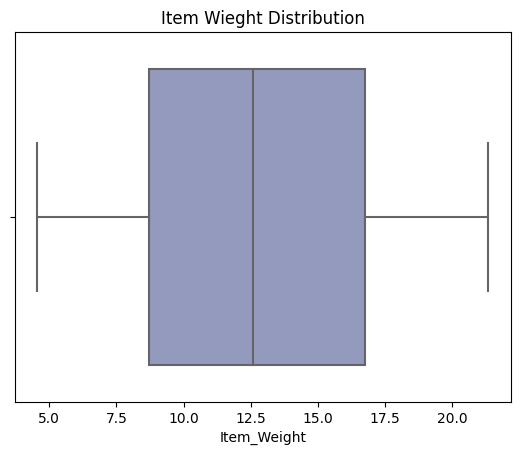

In [860]:
sns.boxplot(x=data['Item_Weight'], palette='BuPu')
plt.title('Item Wieght Distribution')

No 'Outliers' in **Item_wieght**, So we can replace 'missing values' with its mean

In [861]:
# imputate missing values in item weight
print('Missing Values in Item_Weight: ', data.Item_Weight.isnull().sum())
data.Item_Weight.fillna(value= data['Item_Weight'].mean(), inplace=True)
# miss_values = data.Item_Weight.isnull()
# item_wt_avg = data.pivot_table(values='Item_Weight', index ='Item_Identifier')
# data.loc[miss_values, 'Item_Weight'] = data.loc[miss_values, 'Item_Identifier'].apply(lambda x:item_wt_avg.loc[x])
print('Missing values after filling: ' , sum(data['Item_Weight'].isnull()))

Missing Values in Item_Weight:  2439
Missing values after filling:  0


In [862]:
# check info for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [863]:
# data1 = data.drop(["Item_Identifier", "Outlet_Identifier"], axis=1)
# Data_Profile = ProfileReport(data1)
# Data_Profile

* ###  Veriable Identication

In [864]:
# Numericals
num_df = data.select_dtypes('number')
# Categorial 
cat_df = data.select_dtypes('object')

In [865]:
# Lets Deal with catgorial Data First     
for col in cat_df.columns:
    if(col != 'Item_Identifier'):
        print('\nFrequency of Categories for varible %s'%col)
        print('\nTotal Categories: ', len(cat_df[col].value_counts()), '\n', cat_df[col].value_counts())
        


Frequency of Categories for varible Item_Fat_Content

Total Categories:  5 
 Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type

Total Categories:  16 
 Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Identifier

Total Categories:  10 
 OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019  

In [866]:
# Replace reapted values in Item_Fat_Content
data['Item_Fat_Content'] = data.Item_Fat_Content.replace(['LF', 'low fat', 'reg'],
                                                              ['Low Fat','Low Fat', 'Regular'])
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [867]:
# Combine Item_Type, and create new category
data['Item_Type_Combined'] = data.Item_Identifier.apply(lambda x:x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].replace(['FD','DR','NC'],
                                                                   ['Food','Drinks', 'Non-Consumable']) 
data.Item_Type_Combined.value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [868]:
data.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


There is a huge difference in sales, so not good idea to combine them

In [869]:
# Lets deal with Numerical Data
num_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.234226,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400
50%,12.792854,0.054021,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


* **Item_Visibility**: it has min **0** value, which makes no sense
* **Outlet_Establishment_Year**: Its better to address how old store is

* ###  Outliers

Text(0.5, 1.0, 'Item Outlet Sales Distribution')

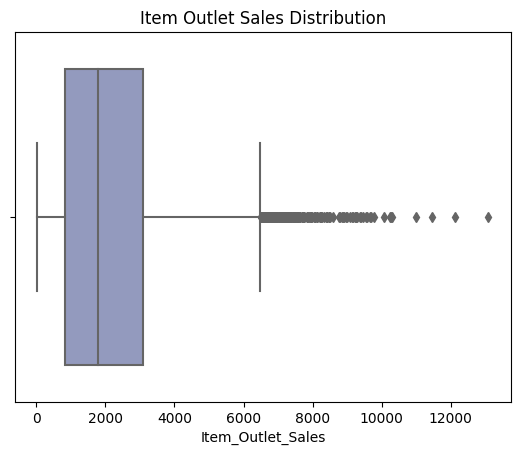

In [870]:
#Box plot for Item_Outlet_Sales to see outliers
sns.boxplot(x=data['Item_Outlet_Sales'], palette='BuPu')
plt.title('Item Outlet Sales Distribution')

In [871]:
# Removing Outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "Item_Outlet_Sales")
print("Upper whisker: ",upper)
print("Lower Whisker: ",lower)
data = data[(data['Item_Outlet_Sales'] > lower) & (data['Item_Outlet_Sales'] < upper)]

Upper whisker:  6501.8699
Lower Whisker:  -2566.3261


Text(0.5, 1.0, 'Item Outlet Sales Distribution after removing outliers')

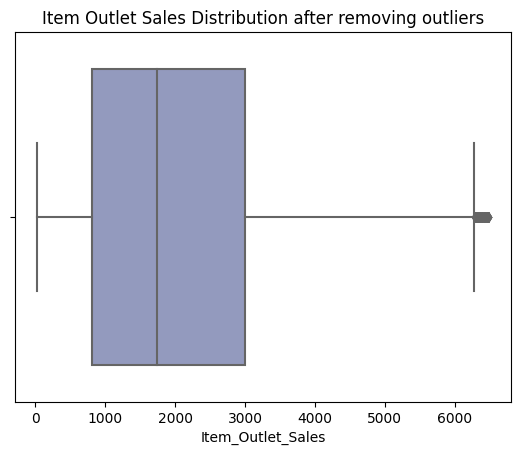

In [872]:
# Item_Outlet_Sales after removing Outliers
sns.boxplot(x=data['Item_Outlet_Sales'], palette='BuPu')
plt.title('Item Outlet Sales Distribution after removing outliers')

In [873]:
# change Establishment_Year to Outlet_Age
data['Oultet_Age'] = 2013 - data['Outlet_Establishment_Year']

In [874]:
# Lets consider 0 as missing value in Item_visibility
print('Missing Values in Item_Visibility: ', len(data[num_df['Item_Visibility'] == 0]))
miss_values = (data['Item_Visibility'] == 0)
item_vis_avg = data.pivot_table(values='Item_Visibility', index ='Item_Identifier')

data.loc[miss_values, 'Item_Visibility'] = data.loc[miss_values, 'Item_Identifier'].apply(lambda x:item_vis_avg.loc[x])
print('Missing values after filling: ' , sum(data['Item_Visibility'].isnull()))

Missing Values in Item_Visibility:  512
Missing values after filling:  0


In [875]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,14
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,Food,15
4,NCD19,8.93,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,26


# ***Data Visualization***

* #### Univariate Plots
lets look at the countplots for categorial data

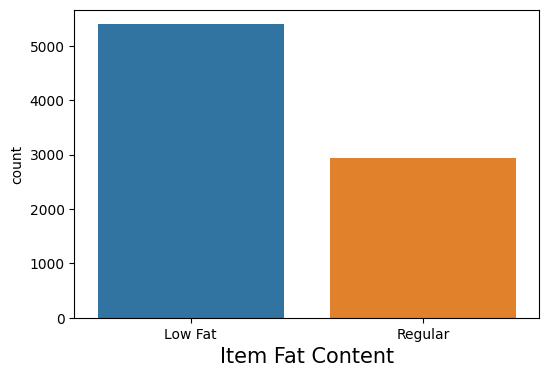

In [876]:
# Categorial Data
['Item_Identifier', 'Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size',
'Outlet_Location_Type', 'Outlet_Type', 'Item_Type', 'Item_Type_Combined' ]

# CountPlot for Item_Fat_Content
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Item_Fat_Content')
plt.xlabel('Item Fat Content', fontsize=15)
plt.show()

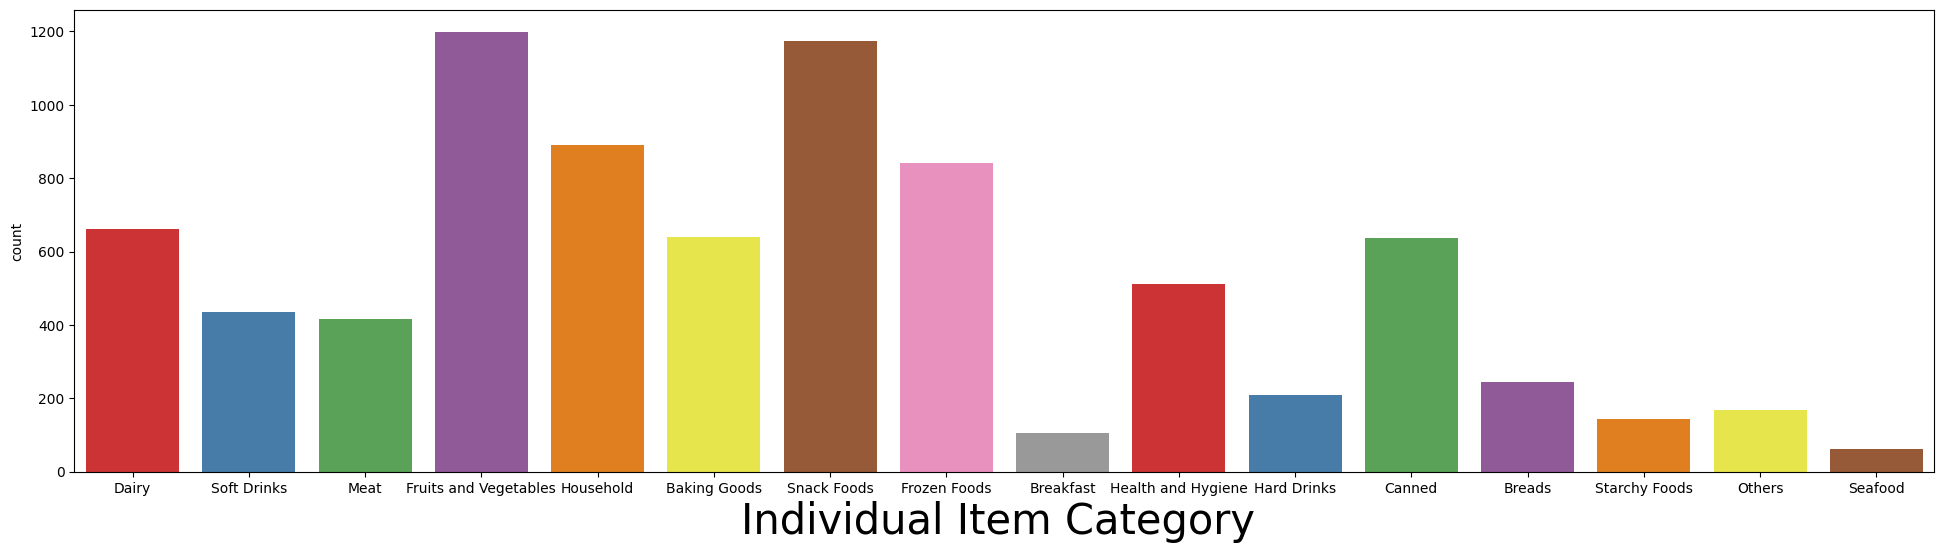

In [877]:
# CountPlot for Individual Item Category
plt.figure(figsize=(24,6))
sns.countplot(data=data, x='Item_Type',  palette='Set1')
plt.xlabel('Individual Item Category ', fontsize=30)
plt.show()

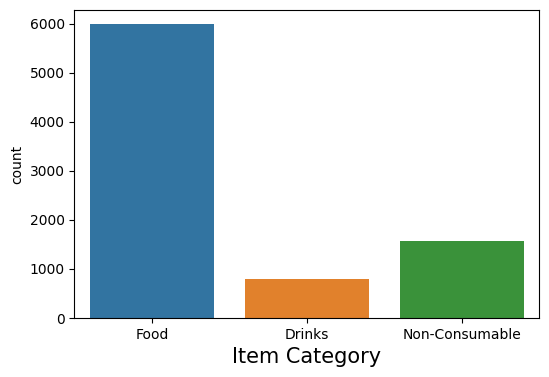

In [878]:
#  CountPlot for Item_Type_Combined
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Item_Type_Combined')
plt.xlabel('Item Category', fontsize=15)
plt.show()

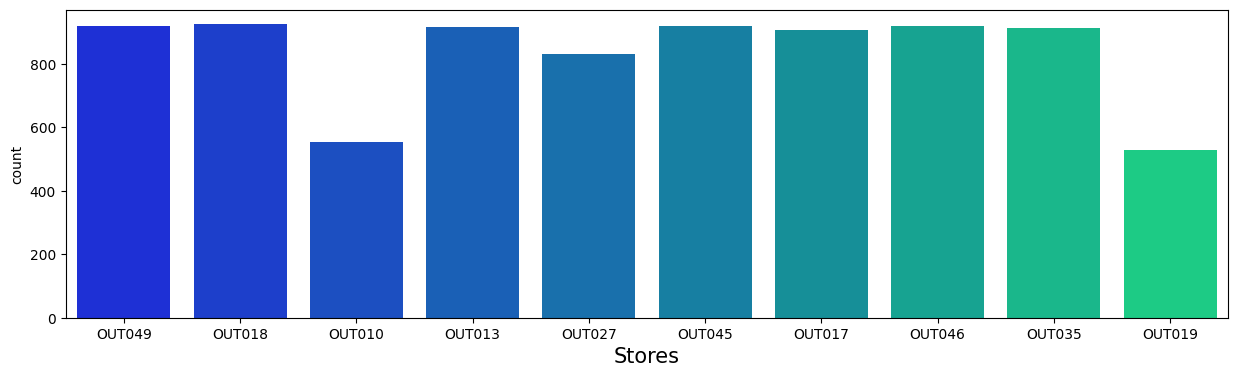

In [879]:
# CountPlot for Outlet_Identifier
plt.figure(figsize=(15,4))
sns.countplot(data=data, x='Outlet_Identifier', palette='winter')
plt.xlabel('Stores', fontsize=15)
plt.show()

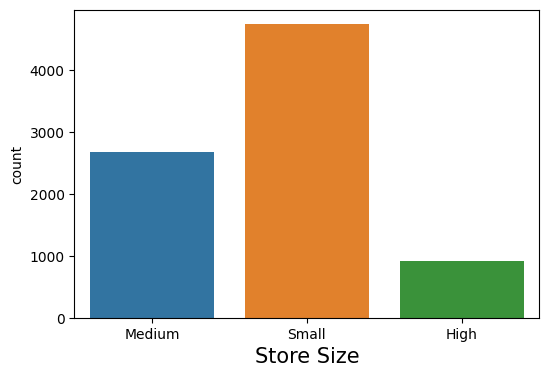

In [880]:
# CountPlot for Outlet_Size
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Outlet_Size')
plt.xlabel('Store Size', fontsize=15)
plt.show()

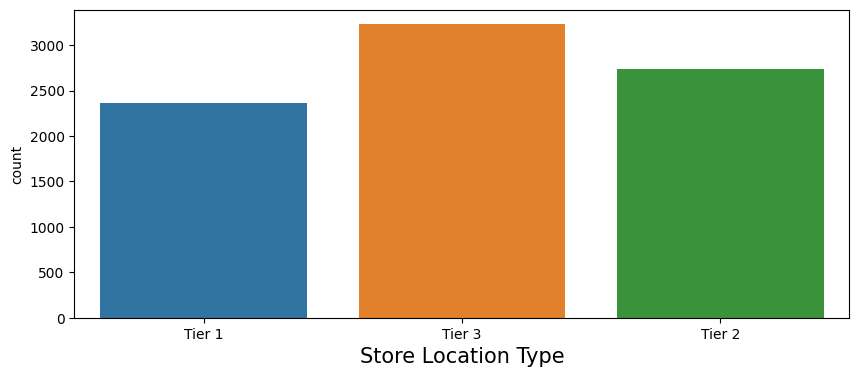

In [881]:
# CountPlot for Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.countplot(data=data, x='Outlet_Location_Type')
plt.xlabel('Store Location Type', fontsize=15)
plt.show()

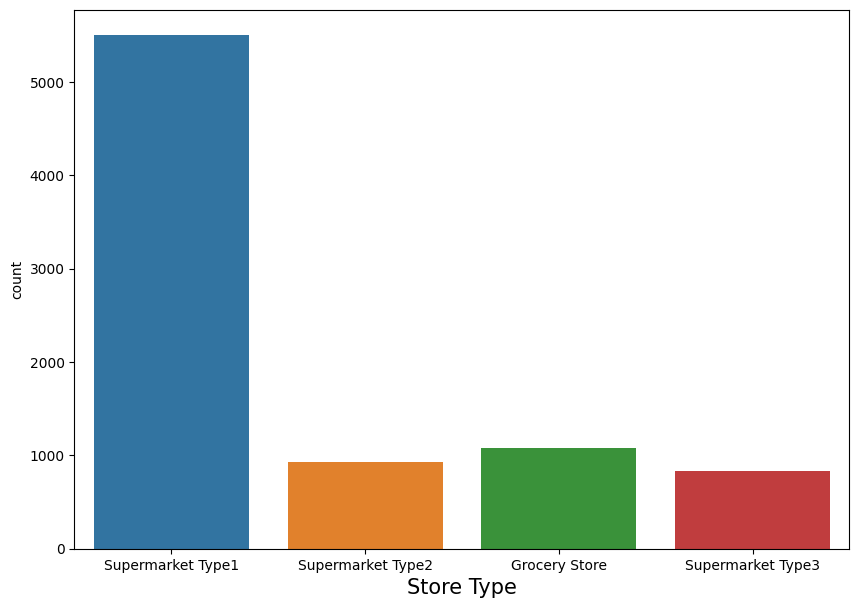

In [882]:
# CountPlot for Outlet_Type
plt.figure(figsize=(10,7))
sns.countplot(data=data, x='Outlet_Type')
plt.xlabel('Store Type', fontsize=15)
plt.show()

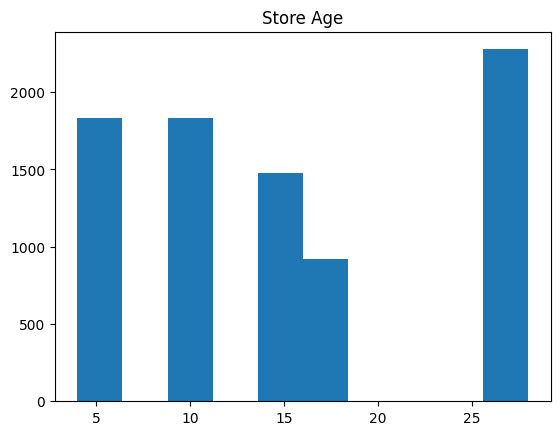

In [883]:
# For Numerical Data

# HistPlot for Outlet_Age
plt.hist(x=data['Oultet_Age'], )
plt.title('Store Age')
plt.show()

#### Realizations
* **Outlet_Age**: Most Common **Outlets** are 35 year's old.

* ### Bivariate plots For Numeric.
> Let's check following relationships
* **Sales per Item_MRP**
* **Sales per Item_Visibility**
* **Sales per Item_Weight**

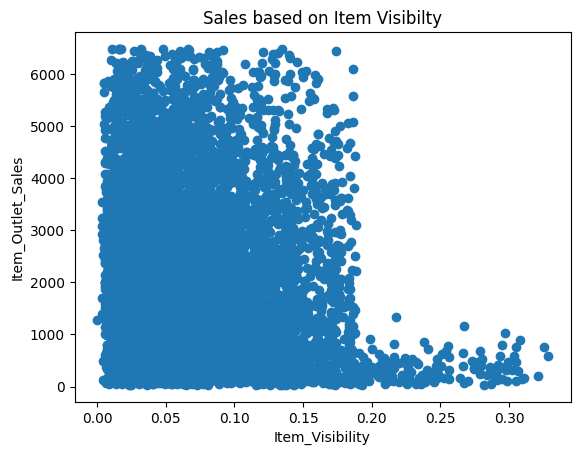

In [884]:
# ScatterPlot for Sales per Item_Visibilty
plt.scatter(data['Item_Visibility'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item Visibilty')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

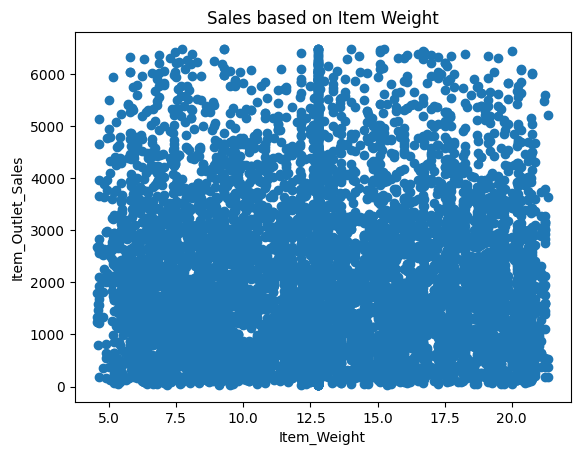

In [885]:
# ScatterPlot for Sales per Item_Weight
plt.scatter(data['Item_Weight'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

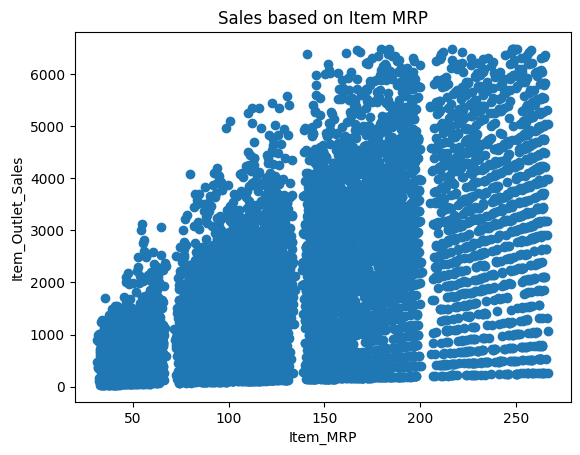

In [886]:
# ScatterPlot for Sales per Item_MRP
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

* ### Bivariate plots For Categorical.
> Let's check following relationships

* **Sales per Item_Type_Combined**
* **Sales per Outlet_Identifier**
* **Sales per Outlet_Type**
* **Sales per Outlet_Size**
* **Sales per Outlet_Location_Type**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


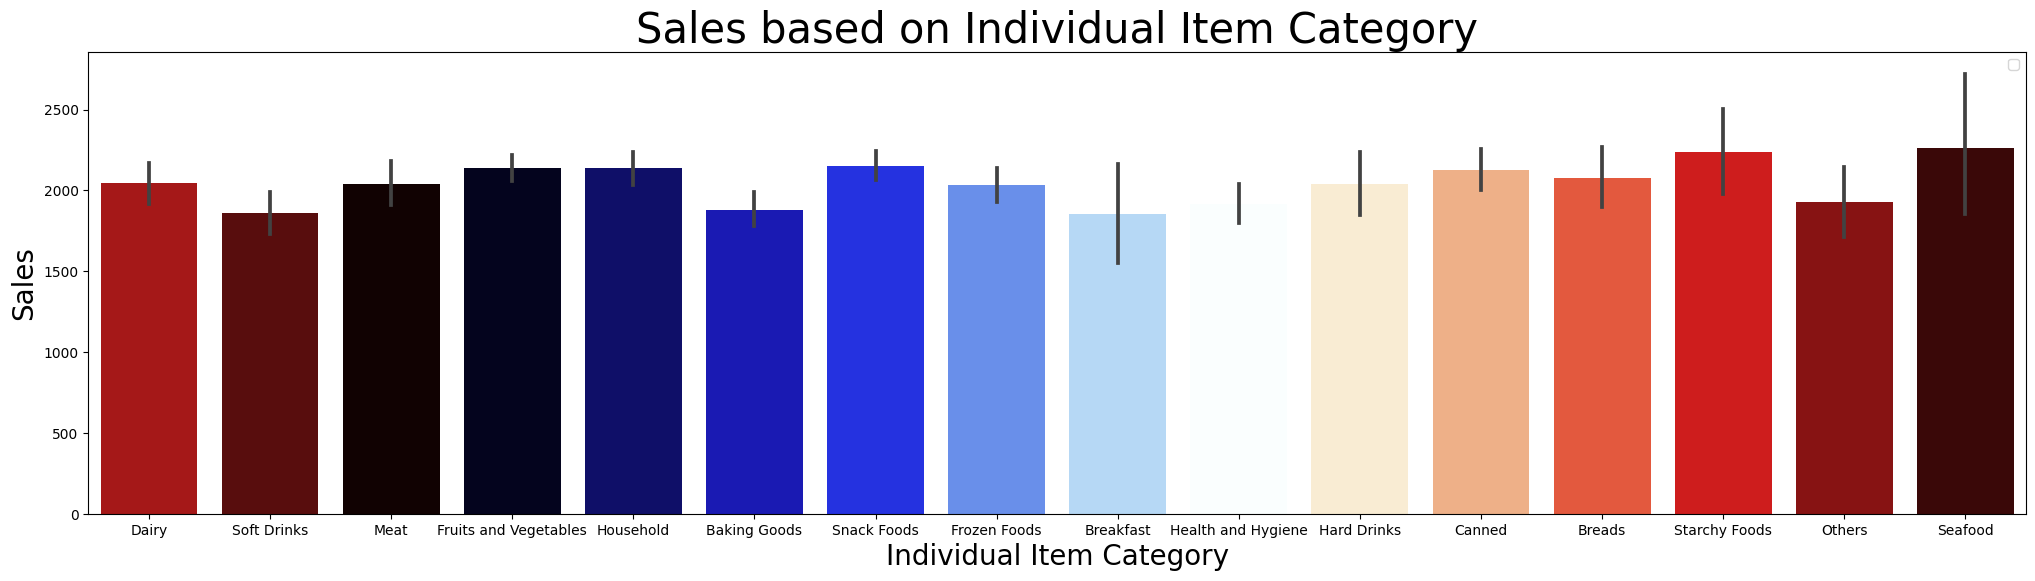

In [887]:
# BarPlot for Sales per Item_Type
plt.figure(figsize=(25,6))
sns.barplot(data=data,x='Item_Type', y='Item_Outlet_Sales', palette='flag')
plt.title('Sales based on Individual Item Category', fontsize=30)
plt.xlabel('Individual Item Category', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


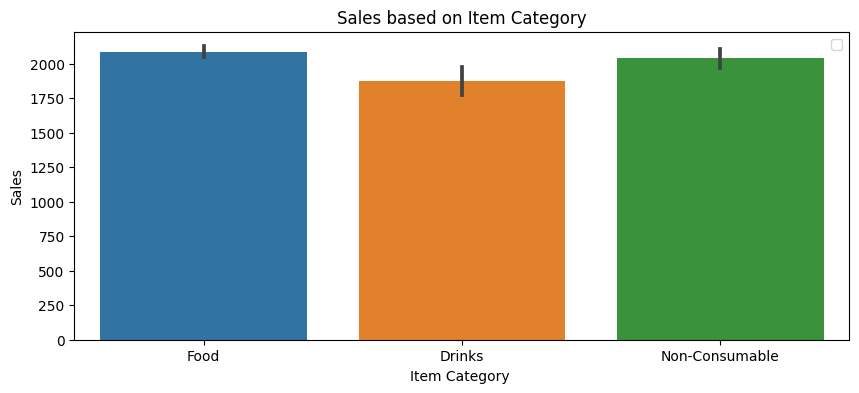

In [888]:
# BarPlot for Sales per Item_Type_Combined
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Item_Type_Combined', y='Item_Outlet_Sales')
plt.title('Sales based on Item Category')
plt.xlabel('Item Category ')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


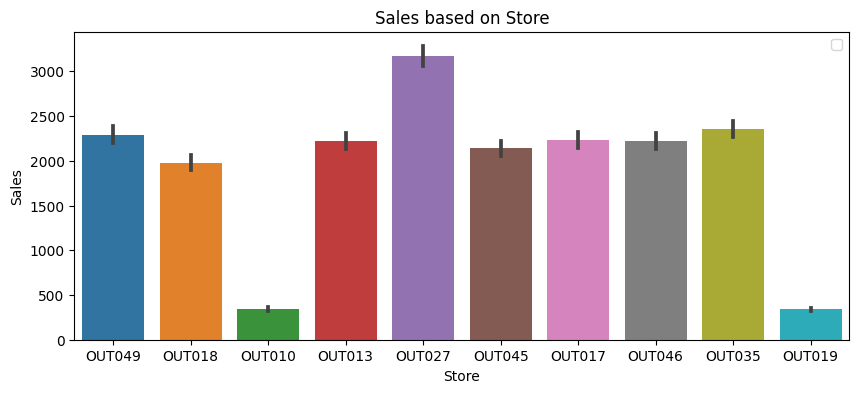

In [889]:
# BarPlot for Sales per Outlet_Identifier
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Outlet_Identifier', y='Item_Outlet_Sales')
plt.title('Sales based on Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


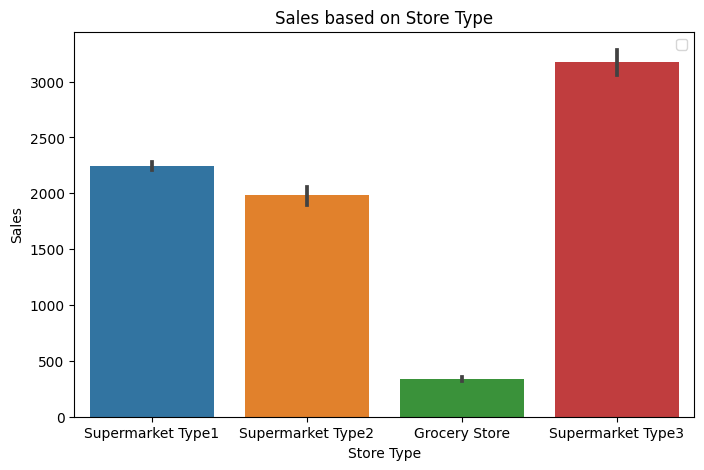

In [890]:
# BarPlot for Sales per Outlet_Type
plt.figure(figsize=(8,5))
sns.barplot(data=data,x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


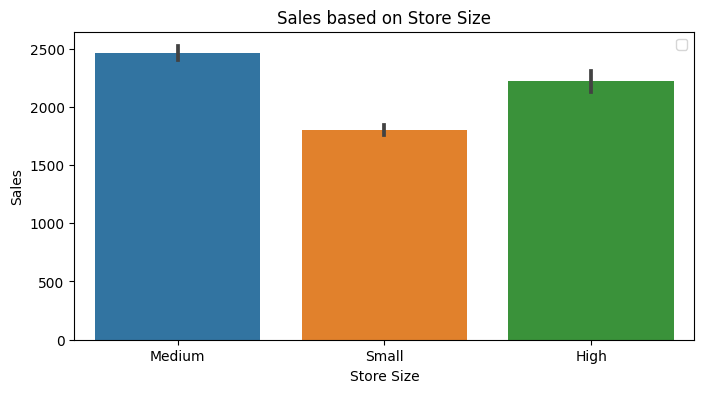

In [891]:
# BarPlot for Sales per Outlet_Size
plt.figure(figsize=(8,4))
sns.barplot(data=data,x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Sales based on Store Size')
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


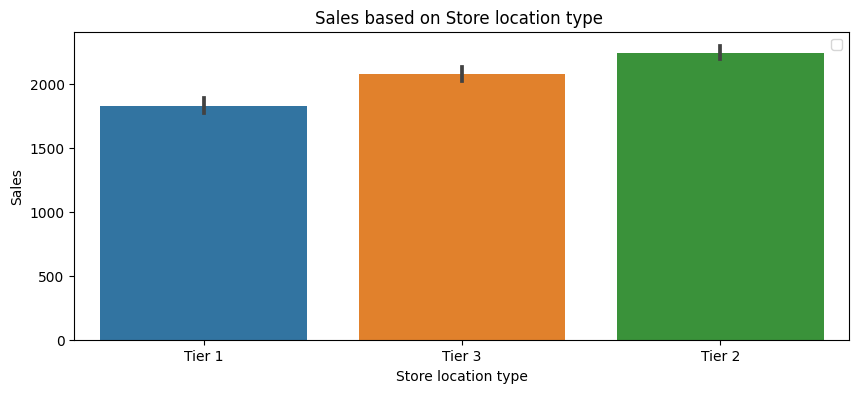

In [892]:
# BarPlot for Sales per Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Multivariate plots.
Numerical vs. Numerical
1. Scatterplot
2. Line plot
3. Heatmap for correlation
4. Joint plot

Categorical vs. Numerical
1. Bar chart
2. Voilin plot
3. Categorical box plot
4.Swarm plot

Two Categorcal Variables
1. Bar chart
2. Grouped bar chart
3. Point plot

> Let's check following data
* **Outlet Type in all Outlet location based on sales.**
* **Sales of Item_Type based on Outlet_Type.**
* **Outlet_Location_Type of Outlet_Type based on sales.**
* **Sales of Outlet_Location_Type based on Item_Type_Combined.**

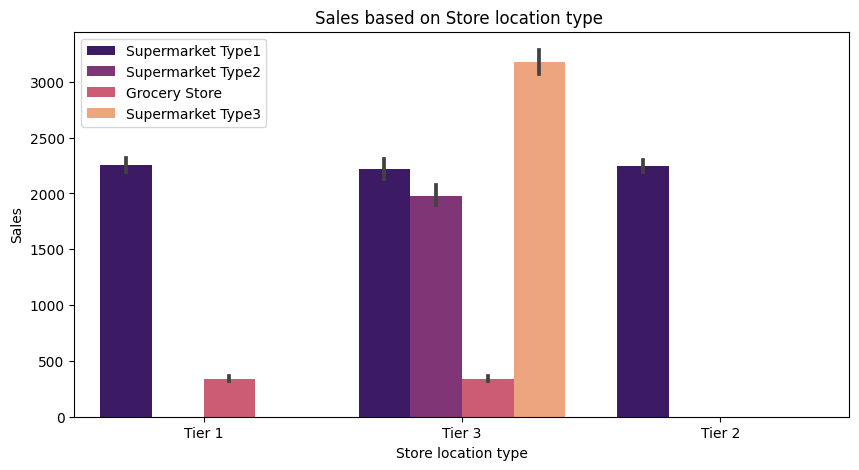

In [893]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type',palette='magma')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.legend()
plt.show()

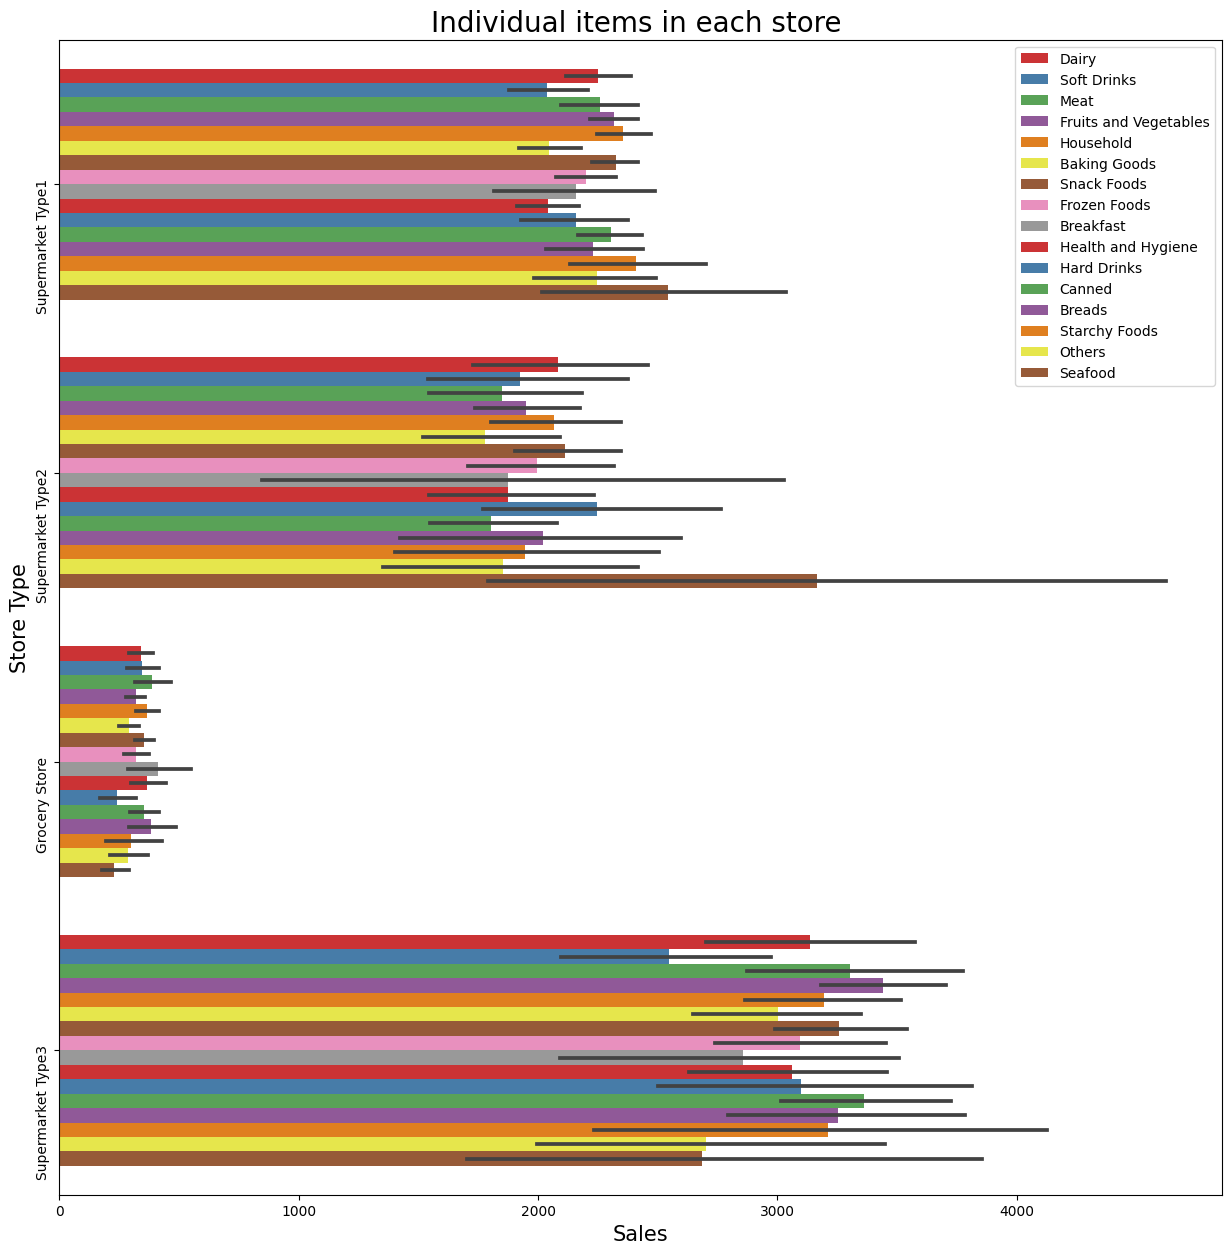

In [894]:
plt.figure(figsize=(15,15))
sns.barplot(data=data,x='Item_Outlet_Sales', y='Outlet_Type',hue='Item_Type',palette='Set1')
plt.title('Individual items in each store ', fontsize=20)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Store Type', fontsize=15)
plt.yticks(rotation=90)
plt.legend()
plt.show()

In [895]:
# plt.figure(figsize=(10,5))
# sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=data,palette='magma')
# plt.legend()

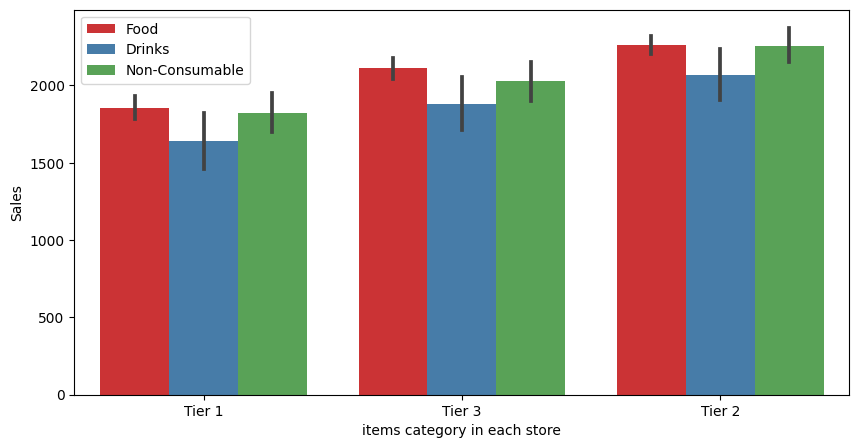

In [896]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Item_Type_Combined',palette='Set1')
plt.xlabel('items category in each store', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.legend()
plt.show()

In [897]:
# plt.figure(figsize=(10,5))
# sns.barplot('Outlet_Type','Item_Outlet_Sales',hue='Outlet_Location_Type',data=data,palette='magma')
# plt.legend()

### Correlation Matrix

<AxesSubplot: >

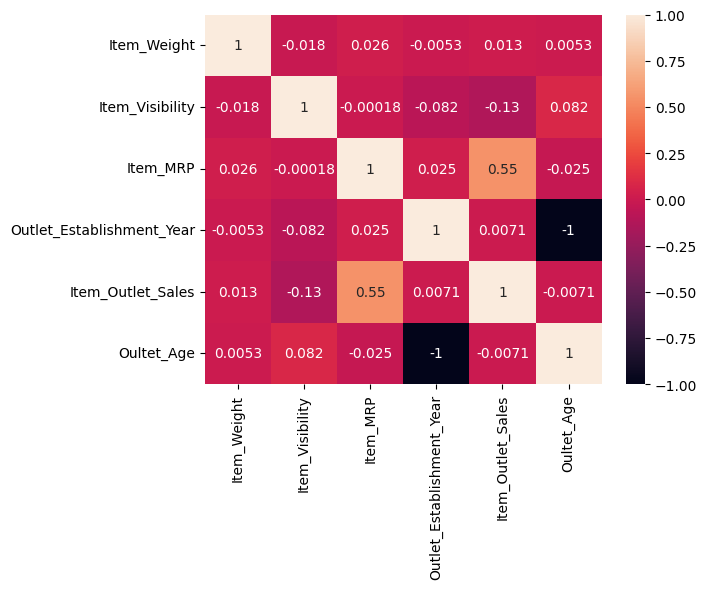

In [898]:
# Correlation Matrix
plt.Figure(figsize=(20,5))
sns.heatmap(data.corr(), annot=True)

* We can see **Item_Outlet_Sales** is highly correlated with **Item_MRP**
* We can see **Outlet_Age** and **Item_Visibility** are negativaly correlated we need to drop them

### Feature Engneering

In [899]:
#Label Encoding for Ordinal Data
le = LabelEncoder()
label = ['Item_Fat_Content', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size']
for i in label:
    data[i] = le.fit_transform(data[i])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,Food,14
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,Drinks,4
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,Food,14
3,FDX07,19.20,1,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,train,Food,15
4,NCD19,8.93,0,0.008082,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,Non-Consumable,26


In [900]:
# One-Hot encoding (OHE) for Nominal Data

# Columns for applying One-Hot encoding
cols = ['Item_Type_Combined']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
data_oh = pd.DataFrame(OH_encoder.fit_transform(data[cols])).astype('int64')

# get feature columns
data_oh.columns = OH_encoder.get_feature_names_out(cols)
# # # One-hot encoding removed index; put it back
data_oh.index = data.index

# # # Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
data_fe = pd.concat([data, data_oh], axis=1)
data_fe.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,Food,14,0,1,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,Drinks,4,1,0,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,Food,14,0,1,0
3,FDX07,19.20,1,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,train,Food,15,0,1,0
4,NCD19,8.93,0,0.008082,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,Non-Consumable,26,0,0,1


In [901]:
data_fe.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,Food,14,0,1,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,Drinks,4,1,0,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,Food,14,0,1,0
3,FDX07,19.20,1,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,train,Food,15,0,1,0
4,NCD19,8.93,0,0.008082,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,Non-Consumable,26,0,0,1


In [902]:
# Drop irrlevent Columns
data_fe = data_fe.drop(['Item_Identifier','Item_Type_Combined', 'Outlet_Identifier','Oultet_Age',
                     'Item_Fat_Content','Item_Visibility', 'Item_Type','Item_Type_Combined',
                     'Outlet_Establishment_Year','Item_Type'], axis=1)
data_fe.head()

# Divide Data into train and test
train = data_fe.loc[data_fe['source']=="train"]
test = data_fe.loc[data_fe['source']=="test"]

train = train.drop('source', axis=1)
test = test.drop(['source',  'Item_Outlet_Sales'], axis=1)
# Check Datasets
print('\nTrain Dataset for Model Buidling: \n')
print(train.info(verbose=True, show_counts=True))
print('\nTest Dataset for Model Buidling: \n')
print(test.info(verbose=True, show_counts=True)) 
train.head()


Train Dataset for Model Buidling: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8337 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Item_Weight                        8337 non-null   float64
 1   Item_MRP                           8337 non-null   float64
 2   Outlet_Size                        8337 non-null   int32  
 3   Outlet_Location_Type               8337 non-null   int32  
 4   Outlet_Type                        8337 non-null   int32  
 5   Item_Outlet_Sales                  8337 non-null   float64
 6   Item_Type_Combined_Drinks          8337 non-null   int64  
 7   Item_Type_Combined_Food            8337 non-null   int64  
 8   Item_Type_Combined_Non-Consumable  8337 non-null   int64  
dtypes: float64(3), int32(3), int64(3)
memory usage: 553.6 KB
None

Test Dataset for Model Buidling: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 

,Item_Weight,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.30,249.8092,1,0,1,3735.1380,0,1,0
1,5.92,48.2692,1,2,2,443.4228,1,0,0
2,17.50,141.6180,1,0,1,2097.2700,0,1,0
3,19.20,182.0950,2,2,0,732.3800,0,1,0
4,8.93,53.8614,0,2,1,994.7052,0,0,1


### Regression Models

1. Linear Regression
2. Random Forest
4. XGBoost Regressor

In [903]:
# Train and Test split
y = train['Item_Outlet_Sales']
X = train.drop('Item_Outlet_Sales', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)
# Cross Validation Score after model completion
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [904]:
lr = LinearRegression()

rf = RandomForestRegressor(max_depth = 3, n_estimators=500)

xgb = XGBRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

Testing with linear regression

In [905]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred)
r1

0.4719423747159296

Testing with RandomForestRegressor

In [906]:
rf = RandomForestRegressor(max_depth = 3, n_estimators=500)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.5371016544892615

Testing with XGBoost

In [907]:
xgb = XGBRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
from sklearn.metrics import r2_score
r3 = r2_score(y_test,y_pred)
r3

0.5809534802695675

In [908]:
metric_results= {'Model': ['linear Regression', 'RandomForest', 'XGBoost'], 
                 'R Square': [r1, r2, r3]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R Square
0,linear Regression,0.471942
1,RandomForest,0.537102
2,XGBoost,0.580953


So compairing all the model, We have seen that XGBoost is better model than any other model